# Australian bicycle trade 2014

This notebook looks at the bicycle trade to/from Australia as captured by comtrade.

Which countries were the top importers of bicycles to Australia is 2014?
Which countries did Australia export the most bicycles to in 2014?

## Load data and restrict to useful columns

In [32]:
%matplotlib inline
from pandas import *

## comtrade API call for Bicycles, other cycles, not motorized 2014 monthly Australia 
URL = "http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=36&p=all&rg=2%2C1&cc=8712&fmt=csv"
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']

bicycles = read_csv(URL,dtype={'Commodity Code':str, 'Reporter Code':str})
bicycles=bicycles[COLUMNS]
bicycles.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Imports,Australia,World,"Bicycles, other cycles, not motorized",8712,20383303
1,2014,201401,Exports,Australia,World,"Bicycles, other cycles, not motorized",8712,175499
2,2014,201401,Imports,Australia,Australia,"Bicycles, other cycles, not motorized",8712,2241
3,2014,201401,Imports,Australia,Belgium,"Bicycles, other cycles, not motorized",8712,9197
4,2014,201401,Imports,Australia,Cambodia,"Bicycles, other cycles, not motorized",8712,297827


## Split into imports and exports datasets

In [33]:
trade_flows = bicycles.groupby('Trade Flow')
trade_flows.groups.keys()

dict_keys(['Imports', 'Exports'])

In [34]:
bicycle_imports = trade_flows.get_group("Imports")
bicycle_imports.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Imports,Australia,World,"Bicycles, other cycles, not motorized",8712,20383303
2,2014,201401,Imports,Australia,Australia,"Bicycles, other cycles, not motorized",8712,2241
3,2014,201401,Imports,Australia,Belgium,"Bicycles, other cycles, not motorized",8712,9197
4,2014,201401,Imports,Australia,Cambodia,"Bicycles, other cycles, not motorized",8712,297827
6,2014,201401,Imports,Australia,Canada,"Bicycles, other cycles, not motorized",8712,4710


In [35]:
bicycle_exports = trade_flows.get_group('Exports')
bicycle_exports.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
1,2014,201401,Exports,Australia,World,"Bicycles, other cycles, not motorized",8712,175499
5,2014,201401,Exports,Australia,Cambodia,"Bicycles, other cycles, not motorized",8712,2215
7,2014,201401,Exports,Australia,Canada,"Bicycles, other cycles, not motorized",8712,7086
9,2014,201401,Exports,Australia,Christmas Isds,"Bicycles, other cycles, not motorized",8712,2012
10,2014,201401,Exports,Australia,Czech Rep.,"Bicycles, other cycles, not motorized",8712,13674


## Get totals by trading partner for bicycle exports

Sort and display list, and show top 10 compared to world in a bar plot.

In [36]:
partner_totals_exports = bicycle_exports.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
partner_totals_exports_sorted = partner_totals_exports.sort(ascending=False, inplace=False)
partner_totals_exports_sorted

Partner
World                       5185879
New Zealand                 2659336
Other Asia, nes              713912
Japan                        423116
United Kingdom               229723
Rep. of Korea                195066
United States of America     157520
China                        128904
Spain                        103854
Singapore                     68917
Iraq                          67278
Chile                         62495
Italy                         59146
New Caledonia                 54044
China, Hong Kong SAR          43235
Canada                        32558
France                        19670
Namibia                       14190
Czech Rep.                    13674
Netherlands                   13340
Nauru                         12021
Christmas Isds                10451
Ireland                        9948
Norfolk Isds                   9827
Malaysia                       8983
Viet Nam                       8006
Brazil                         7752
Switzerland         

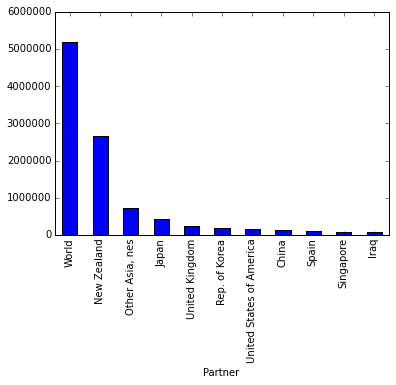

In [37]:
partner_totals_exports_sorted.head(11).plot(kind="bar")

## Get totals by trading partner for bicycle imports

Sort and display list, and show top 10 compared to world in a bar plot.

In [38]:
partner_totals_imports = bicycle_imports.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
partner_totals_imports_sorted = partner_totals_imports.sort(ascending=False, inplace=False)
partner_totals_imports_sorted

Partner
World                       248408322
China                       122472160
Other Asia, nes              95803585
United States of America     12494345
Germany                       5394221
Cambodia                      2203772
Italy                         2092516
Indonesia                     1417533
United Kingdom                1106310
Netherlands                    977286
Switzerland                    821220
Canada                         616204
Spain                          531308
Viet Nam                       473883
Bangladesh                     392776
Belgium                        347888
France                         205256
Belize                         202343
Singapore                      190566
Denmark                        137070
Hungary                        106610
Australia                       91924
China, Hong Kong SAR            90715
New Zealand                     68797
Thailand                        51014
Austria                         33462
Japa

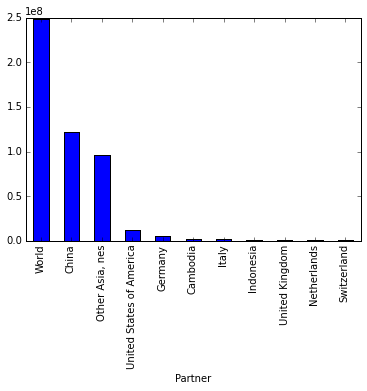

In [39]:
partner_totals_imports_sorted.head(11).plot(kind="bar")